<h1><center> Predicting Housing Prices </center></h1>

## Comparing Multiple Linear Regression, Simple Linear Regression, and Lasso Regression Models



In [1]:
import pandas as pd
import numpy as np
from sklearn import (
    linear_model, metrics, neural_network, pipeline,
    model_selection, tree
)
from sklearn.ensemble import RandomForestRegressor
# load data

ahs = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/quantecon-notebooks-datascience/master/problem_sets/ahs-train.csv')
ahs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Columns: 151 entries, LOGVALUE to NOWIRE
dtypes: float64(13), int64(138)
memory usage: 2.9 MB


In [2]:
# dataframe of variable descriptions
ahs_doc = pd.read_csv("https://raw.githubusercontent.com/QuantEcon/quantecon-notebooks-datascience/master/problem_sets/ahs-doc.csv", encoding="latin1")
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'max_colwidth', -1):
    display(ahs_doc[["Variable","Question","Description","Associated.Response.Codes"]])

,Variable,Question,Description,Associated.Response.Codes
0,NEWC,This is a recoded variable based on the month and year the unit was built and the month and year of the interview.,New construction in last 4 years,1: Yes||2: No
1,METRO,This recode specifies all central cities in each MSA.,Multiple central cities/suburban status within metro areas,1: Primary central city of the MSA||2:6: Secondary central cities of the MSA||7: Suburb of the MSA||9: Not in one of the supplemental metropolitan areas
2,METRO3,NaN,Central city / suburban status,"1: Central city of MSA||2: Inside MSA, but not in central city - urban||3: Inside MSA, but not in central city - rural||4: Outside MSA, urban||5: Outside MSA, rural||9: Inside MSA, unspecified (Charlotte only)"
3,REGION,NaN,Census region,1: Northeast||2: Midwest||3: South||4: West
4,CONDO,Is this unit part of a condominium?,Flag indicating unit is a condominium,1: Yes||2: No||N or -6 (2015 and later) / B or -6 (2013 and earlier): Not applicable
5,OWNLOT,See User Notes,Flag indicating owner owns the lot,1: Yes||2: No||M or -9 (2015 and later) / Blank or -9 (2013 and earlier): Not reported||M or -9 (2015 and later) / D or -7 (2013 and earlier): Not reported (2015 and later) / Don't Know (2013 and earlier)||M or -9 (2015 and later) / R or -8 (2013 and earlier): Not reported (2015 and later) / Refused (2013 and earlier)||N or -6 (2015 and later) / B or -6 (2013 and earlier): Not applicable
6,NUNITS,How many apartments are in the building?,Number of units in building,1:997: 1-997 apartments||998: 998 apartments or more||B or -6: Not applicable
7,TYPE,"Is this unit (or address) a house, an apartment, a manufactured/mobile home, or some other type of residence?",Housing unit type,"1: House, apartment, flat||2: Mobile home with No permanent room added||3: Mobile home with permanent room added||4: HU, in nontransient hotel, motel, etc.||5: HU, in permanent transient hotel, motel, etc.||6: HU, in rooming house||7: Boat or recreation vehicle||8: Tent, cave, or railroad car||9: HU, not specified above||10: Unoccupied site for mobile home, trailer or tent||11: Group Quarters||B or -6: Not applicable"
8,NUNIT2,These living quarters in a -,Are these living quarters in a,"1: One-unit building, detached from any other building||2: One-unit building, attached to one or more buildings||3: Building with two or more apartments||4: Manufactured (mobile) home||B or -6: Not applicable"
9,BUILT,"Year this housing unit was built. (If respondent replies DK or is uncertain, probe: Do you know what decade, such as the 80's, 70's, 60's or some other decade?)",Year unit was built,1919: 1919 or earlier||1920: 1920-1929||1930: 1930-1939||1940: 1940-1949||1950: 1950-1959||1960: 1960-1969||1970: 1970-1974||1975: 1975-1979||1980: 1980-1984||1985: 1985-1989||1990:2013: 1990-2013||B or -6: Not applicable


## First I'm going to explore the data and make some simple visualizations just to orient myself

In [3]:
ahs.tail()

,LOGVALUE,REGION,METRO,METRO3,PHONE,KITCHEN,MOBILTYP,WINTEROVEN,WINTERKESP,WINTERELSP,...,FREEZE,IFCOLD,IFDRY,IFSEW,NUMCOLD,NUMDRY,NUMSEW,NUMTLT,OTHCLD,NOWIRE
2495,12.206073,4,7,2,1,1,-1,2,2,2,...,2,-1,2,2,1.828194,1.618421,1.747475,2.012346,-6,1
2496,12.301383,3,7,2,1,1,-1,2,2,2,...,2,-1,2,2,1.828194,1.618421,1.747475,2.012346,-6,1
2497,13.997832,4,1,1,1,1,-1,2,2,2,...,2,-1,2,2,1.828194,1.618421,1.747475,2.012346,-6,1
2498,11.156251,3,1,1,1,1,-1,2,2,1,...,2,-1,2,2,1.828194,1.618421,1.747475,2.012346,-6,1
2499,4.248495,3,4,1,1,1,-1,2,2,2,...,2,-1,2,2,1.828194,1.618421,1.747475,2.012346,-6,1



"ROOMS" is the # of rooms in the residence

"UNITSF" is the square footage of the residence

"LOT" is the size of the lot

"BUILT" is the year the residence was built



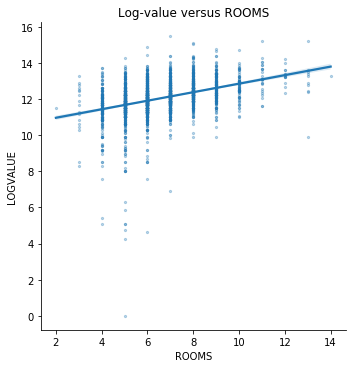

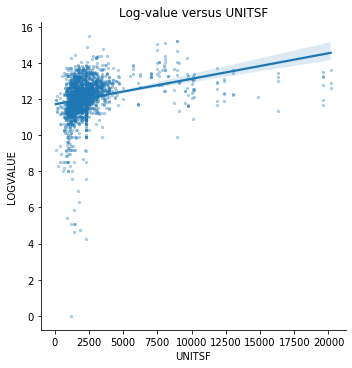

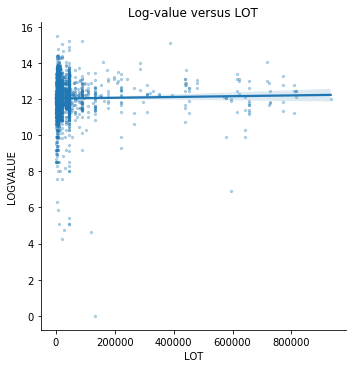

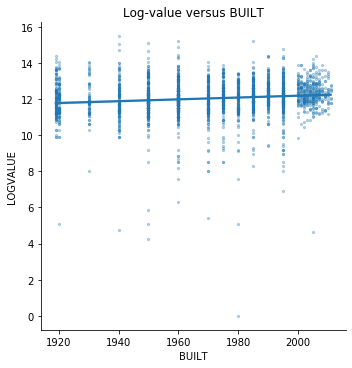

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)


def var_scatter(df, ax=None, var="ROOMS"):
   # if ax is None:
        #_, ax = plt.subplots(figsize=(8, 6))
    #df.plot.scatter(x=var , y="LOGVALUE", alpha=0.35, s=1.5, ax=ax)
    
    sns.lmplot(data=df, x=var, y="LOGVALUE", height=5, scatter_kws=dict(s=5, alpha=0.3))
    plt.title(f'Log-value versus {var}')
    return ax

print('\n"ROOMS" is the # of rooms in the residence\n\n"UNITSF" is the square footage of the residence\n\n"LOT" is the size of the lot\n\n"BUILT" is the year the residence was built\n')

var_scatter(ahs, var="ROOMS");
var_scatter(ahs, var="UNITSF");
var_scatter(ahs, var="LOT");
var_scatter(ahs, var="BUILT");

The scatter plots seem to show that UNITSF and LOT are right-skewed. Let's take a look at their histograms:

Text(0.5, 1.0, 'LOT')

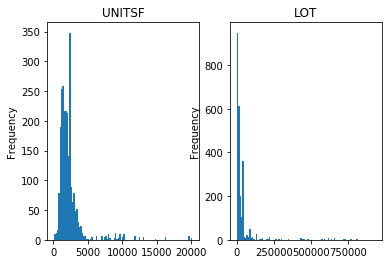

In [5]:
fig, axes = plt.subplots(1, 2)

ahs["UNITSF"].plot.hist('rate', bins=100, ax=axes[0])
ahs["LOT"].plot.hist('rate', bins=100, ax=axes[1])

axes[0].set_title('UNITSF')
axes[1].set_title('LOT')


Yup those are definitely right-skewed. Let's try creating and plotting a logarithmic transformation for both LOT and UNITSF.

Text(0.5, 1.0, 'Log LOT')

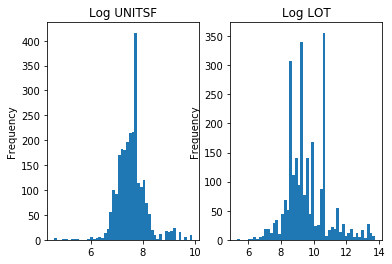

In [6]:
# Making a copy of the DF that has a column for each log transformation
ahs2 = ahs.copy()
ahs2["LogUNITSF"] = np.log(ahs2["UNITSF"])
ahs2["LogLOT"] = np.log(ahs2["LOT"])

# Getting rid of the non-log transformed original columns:
ahs2 = ahs2.drop(columns= ["UNITSF","LOT"])

# Plotting the histograms of these new columns:
fig, axes = plt.subplots(1, 2)
ahs2["LogUNITSF"].plot.hist('rate', bins=50, ax=axes[0])
ahs2["LogLOT"].plot.hist('rate', bins=50, ax=axes[1])
axes[0].set_title('Log UNITSF')
axes[1].set_title('Log LOT')



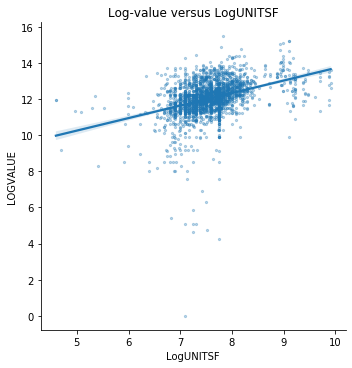

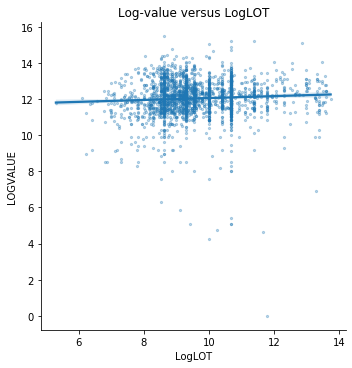

In [7]:
var_scatter(ahs2, var="LogUNITSF");
var_scatter(ahs2, var="LogLOT");

Let's take another look at log-value versus log(square footage):



Text(0, 0.5, 'Log-value of residence')

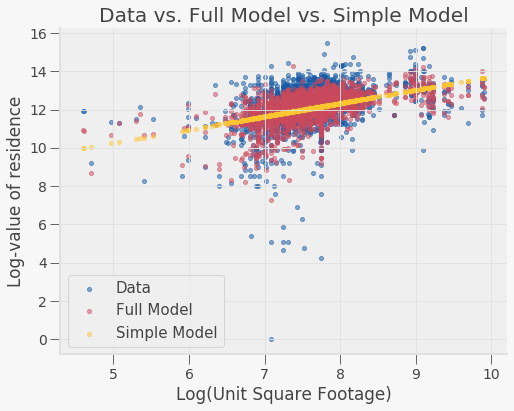

In [8]:
print("Let's take another look at log-value versus log(square footage):\n")


# Getting colours :) 

import qeds
qeds.themes.mpl_style();
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE



# Creating alternative plotting function for ease of stacking models on it:

def var_scatter_2(df, ax=None, var="LogUNITSF"):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x=var , y="LOGVALUE", alpha=0.5, s=17, ax=ax)
    
    return ax



# Plotting data:

ax = var_scatter_2(ahs2, var="LogUNITSF")


# Seperating dependent and independent variables:

y = ahs2["LOGVALUE"]

X = ahs2.drop(["LOGVALUE"], axis=1).copy()
# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)


    
# Fitting the simple linear regression model and the full model (multiple linear regression):

sqft_lr_model = linear_model.LinearRegression()
sqft_lr_model.fit(X[["LogUNITSF"]], y)

lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)



# Defining function to plot models:

def scatter_model(mod, X, ax=None, color=colors[1], x="LogUNITSF"):
    if ax is None:
        _, ax = plt.subplots()

    ax.scatter(X[x], mod.predict(X), c=color, alpha=0.5, s=17)
    return ax


# Plotting models on top of the data:

scatter_model(lr_model, X, ax, color=colors[1])
scatter_model(sqft_lr_model, X[["LogUNITSF"]], ax, color=colors[2])
ax.legend(["Data", "Full Model", "Simple Model"], fontsize=15)
ax.set_title("Data vs. Full Model vs. Simple Model")
plt.xlabel('Log(Unit Square Footage)')
plt.ylabel('Log-value of residence')

The multiple linear regression model, i.e. the "Full Model",
looks like it does a reasonable job at predicting the data from this sample
but it uses 150+ independent variables to estimate values - this model
might be overfitting and have limited practical use for estimating 
log-values of residence outside of the sample set. 

It may be best then to choose only the most powerful predictors of log-value.
Lasso regression is one way to achieve this. 

As a next step we can train the 'Full Model' and a Lasso Model on a subset of the data and then test both models on the rest of the data not in the training subset. Comparing the MSE of both models from the testing subset will give us an indication as to whether or not the 'Full Model' was overfitting'.

## Now I'm going to investigate to see whether or not a Lasso model will be useful for this data

As stated above, I will test the multiple linear regression (MLR) model and a Lasso regression and compare the MSE on the test subset before making any decision about which model to use for prediction. I am anticipating that the Lasso model will have a lower MSE for the test subset.

In [9]:

# Fitting a Lasso model to our data:

lasso_model = linear_model.Lasso()
lasso_model.fit(X, y)

# Checking out the Lasso coefficients:
# and making it so that I can scroll through the entire dataframe of coefficients
pd.set_option("display.max_rows", None, "display.max_columns", None)

lasso_coefs = pd.Series(dict(zip(list(X), lasso_model.coef_)))
lr_coefs = pd.Series(dict(zip(list(X), lr_model.coef_)))
coefs = pd.DataFrame(dict(lasso=lasso_coefs, linreg=lr_coefs))
coefs



,lasso,linreg
REGION,0.000000,2.404203e-01
METRO,0.000000,5.808261e-03
METRO3,0.000000,1.035560e-03
PHONE,0.000000,9.449364e-04
KITCHEN,0.000000,1.428767e+00
MOBILTYP,-0.000000,5.276561e-01
WINTEROVEN,0.000000,-9.878355e-03
WINTERKESP,0.000000,1.761728e-01
WINTERELSP,0.000000,8.229124e-03
WINTERWOOD,0.000000,-1.355510e-01


Scrolling through this dataframe we can see that the only non-zero coefficient is on the variables "BUILT".

This variable represents the year the residence was built.

This makes a certain amount of intuitive sense that the year the residence was built has an effect on its value; what is suprising however is that other metrics like LogUNITSF or LogLOT were not included.  

To see how the Lasso model compares to the MLR model we should test the Lasso and MLR models and compare their respective MSE's (mean standard errors) for the testing subset.

In [10]:
def fit_and_report_mses(mod, X_train, X_test, y_train, y_test):
    mod.fit(X_train, y_train)
    return dict(
        mse_train=metrics.mean_squared_error(y_train, mod.predict(X_train)),
        mse_test=metrics.mean_squared_error(y_test, mod.predict(X_test))
    )

n_test = 200
X_train = X.iloc[:n_test, :]
X_test = X.iloc[n_test:, :]
y_train = y.iloc[:n_test]
y_test = y.iloc[n_test:]

fit_and_report_mses(linear_model.LinearRegression(), X_train, X_test, y_train, y_test)

{'mse_train': 0.15939143545131512, 'mse_test': 5.3095550220702545}

In [11]:
fit_and_report_mses(linear_model.Lasso(), X_train, X_test, y_train, y_test)

{'mse_train': 1.1373377907578581, 'mse_test': 1.0212459244325731}

For the full linear regression model, the MSE on the training dataset is smaller than the MSE on the testing dataset, indicating that the full linear regression model was overfitting.

The MSE for the Lasso model decreases from the training dataset to the testing dataset however. This would all seem to suggest that the Lasso model avoids overfitting and will be a better predictor of 'LOGVALUE'.

All in all this would seem to indicate that the Lasso should be model we use to predict 'LOGVALUE'.

## Now I'm going to optimize parameters for my Lasso model

The following 3 cells of code show how I went about choosing the alpha parameter that minimizes the average MSE. My regularization process was this: check MSE for training and testing subsets for both Linear and Lasso regression (see previous few cells) and then attempt to further optimize the Lasso model's alpha parameter to further carry out regularization:

I use cross-validiation to choose the optimal alpha, i.e. the regularization parameter.

Text(-2.3688789921995554, 1.1583242273548646, 'train')

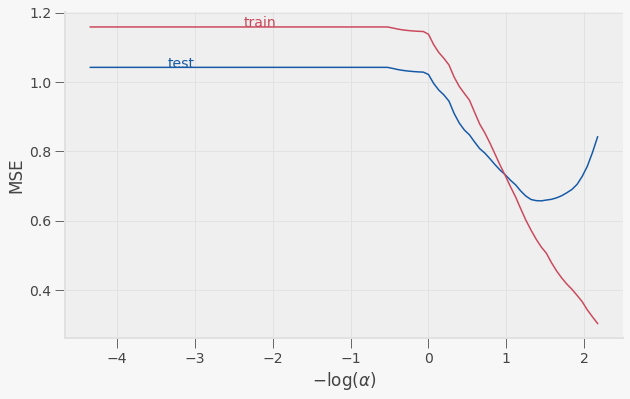

In [12]:
alphas = np.exp(np.linspace(10, -5, 100))
mse = pd.DataFrame([fit_and_report_mses(linear_model.Lasso(alpha=alpha, max_iter=50000),
                           X_train, X_test, y_train, y_test)
                    for alpha in alphas])
mse["log_alpha"] = -np.log10(alphas)

fig, ax = plt.subplots(figsize=(10,6))
colors = qeds.themes.COLOR_CYCLE
mse.plot(x="log_alpha", y="mse_test", c=colors[0], ax=ax)
mse.plot(x="log_alpha", y="mse_train", c=colors[1], ax=ax)
ax.set_xlabel(r"$-\log(\alpha)$")
ax.set_ylabel("MSE")
ax.get_legend().remove()
ax.annotate("test",(mse.log_alpha[15], mse.mse_test[15]),color=colors[0])
ax.annotate("train",(mse.log_alpha[30], mse.mse_train[30]),color=colors[1])

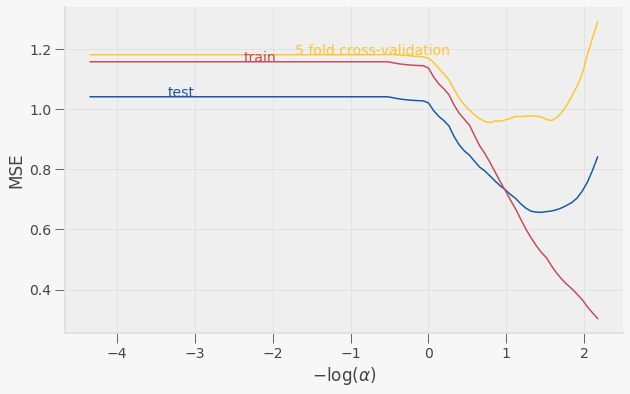

In [13]:
from sklearn.model_selection import cross_val_score
mse["cv"] = [-np.mean(cross_val_score(linear_model.Lasso(alpha=alpha, max_iter=500000),
                                  X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
          for alpha in alphas]
mse.plot(x="log_alpha", y="cv", c=colors[2], ax=ax)
ax.annotate("5 fold cross-validation", (mse.log_alpha[40], mse.cv[40]), color=colors[2])
ax.get_legend().remove()
ax.set_xlabel(r"$-\log(\alpha)$")
ax.set_ylabel("MSE")
fig

In [14]:
lasso = linear_model.LassoCV(cv=5).fit(X_train,y_train)
optimal_alpha = -np.log10(lasso.alpha_)
optimal_alpha

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023824494093290127, tolerance: 0.019347090615749102
  tol, rng, random, positive)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0452611769389506, tolerance: 0.019347090615749102
  tol, rng, random, positive)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03737090908451535, tolerance: 0.019347090615749102
  tol, rng, random, positive)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15618888168178913, tolerance: 0.019347090615749102
  tol, rng, random, positive)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03540561449833746, tolerance: 0.019791849360313335
  tol, rng, random, positive)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03960933080927731, tolerance: 0.019791849360313335
  tol, rng, random, positive)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14223800443838996, tolerance: 0.01600771576175837
  tol, rng, random, positive)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1251823818235529, tolerance: 0.01600771576175837
  tol, rng, random, positive)


0.7963559516376539

In [15]:
# Making a new Lasso model with our newly found optimal alpha value:
lasso_2 = linear_model.Lasso(alpha=optimal_alpha)
lasso_2.fit(X, y)

# Checking the models coefficients and comparing them to our previous Lasso model:
lasso_coefs = pd.Series(dict(zip(list(X), lasso_model.coef_)))
lasso_2_coefs = pd.Series(dict(zip(list(X), lasso_2.coef_)))
coefs = pd.DataFrame(dict(lasso_new=lasso_2_coefs, lasso_old=lasso_coefs))
coefs

,lasso_new,lasso_old
REGION,0.000000,0.000000
METRO,0.000000,0.000000
METRO3,0.000000,0.000000
PHONE,0.000000,0.000000
KITCHEN,0.000000,0.000000
MOBILTYP,-0.000000,-0.000000
WINTEROVEN,0.000000,0.000000
WINTERKESP,0.000000,0.000000
WINTERELSP,0.000000,0.000000
WINTERWOOD,0.000000,0.000000


## Now, as a further robustness check I will compare my optimized Lasso model against a simple linear regression model

Text(0, 0.5, 'Log-value of residence')

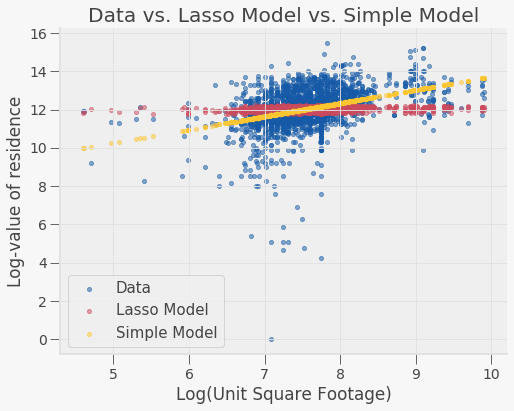

In [16]:
ax = var_scatter_2(ahs2, var="LogUNITSF")

scatter_model(lasso_2, X, ax, color=colors[1])
scatter_model(sqft_lr_model, X[["LogUNITSF"]], ax, color=colors[2])


ax.legend(["Data", "Lasso Model", "Simple Model"], fontsize=15)
ax.set_title("Data vs. Lasso Model vs. Simple Model")
plt.xlabel('Log(Unit Square Footage)')
plt.ylabel('Log-value of residence')

In [17]:
# The Simple Linear Regression looks like it does an equal,
# or perhaps even better job at predicting the log-value of residences
# let's try testing the model's predictive accuracy via MSE comparisons:


n_test = 200
X_simp_train = X["LogUNITSF"].iloc[:n_test].to_numpy().reshape(-1,1)
X_simp_test = X["LogUNITSF"].iloc[n_test:].to_numpy().reshape(-1,1)

print('These are the results for the simple linear model\ni.e. regress "LOGVALUE" on "LogUNITSF"')
fit_and_report_mses(linear_model.LinearRegression(), X_simp_train, X_simp_test, y_train, y_test)

These are the results for the simple linear model
i.e. regress "LOGVALUE" on "LogUNITSF"


{'mse_train': 0.9855722368969139, 'mse_test': 0.8978238679116476}

In [18]:
print('These are the results for Lasso model using the optimal alpha value we found earlier')


fit_and_report_mses(linear_model.Lasso(alpha=optimal_alpha), X_train, X_test, y_train, y_test)

These are the results for Lasso model using the optimal alpha value we found earlier


{'mse_train': 1.0953779522714044, 'mse_test': 0.9853635838443603}

Both these models produce an MSE that decreases from the training subset to the testing subset so we can be sure that they're not overfitting (that should be sort of obvious in the case of the simple linear regression).  Our new Lasso model with our chosen 'optimal_alpha' value improves upon the first Lasso model, if we compare the MSE for the training subset and testing subset, both are lower for our new Lasso model. 
Suprisingly, the simple linear regression has a lower MSE for both the training subset and the testing subset of the data even when compared to new and improved Lasso model!

This corroborates the scatter plot above titled "Data vs. Simple Model vs. Lasso Model". In that graph it appears that the simple linear regression may be making better predictions than the Lasso model. 

After considering the multiple linear regression model and the Lasso model with a cross-validated value of alpha, it would appear that the simple linear regression (regress "LOGVALUE" on "LogUNITSF") provides a prediction of "LOGVALUE" without overfitting. I suppose simple is best sometimes.

## This is really just a bonus:

Made a function that returns the predictions of my model when given an identically formatted DataFrame created from an
identically formatted csv file with all the same variables.

In [19]:
import pandas as pd
import numpy as np
from sklearn import (
    linear_model, metrics, neural_network, pipeline,
    model_selection, tree
)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import qeds
import matplotlib as mpl

def predict_housing_value(df):
    mpl.style.use('seaborn')
    # Adding the log-transformed columns and dropping the original ones
    df["LogUNITSF"] = np.log(df["UNITSF"])
    df["LogLOT"] = np.log(df["LOT"])
    df = df.drop(columns= ["UNITSF","LOT"])
    
    # Seperate independent and dependent variables
    y = df["LOGVALUE"]
    X = df.drop(["LOGVALUE"], axis=1).copy()
    for col in list(X):
        X[col] = X[col].astype(float)
    
    # Fitting model
    sqft_lr_model = linear_model.LinearRegression()
    sqft_lr_model.fit(X[["LogUNITSF"]], y)

    # Get Colours
    qeds.themes.mpl_style();
    plotly_template = qeds.themes.plotly_template()
    colors = qeds.themes.COLOR_CYCLE
    
    # Plot predicted values
    ax=None
    color=colors[1]
    x = "LogUNITSF"
    if ax is None:
        _, ax = plt.subplots()
    ax.scatter(X[x], sqft_lr_model.predict(X[x].to_numpy().reshape(-1,1)), c=color, alpha=0.5, s=17)
    
    # Making it pretty 
    
    ax.set_title("Predicted Log-value of Housing")
    plt.xlabel('Log(Unit Square Footage)', labelpad=15, size=15)
    plt.ylabel('Log-value of residence', labelpad= 20, size=15)
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=4)
    ax.set_facecolor('xkcd:lightblue')
    
    return ax
    


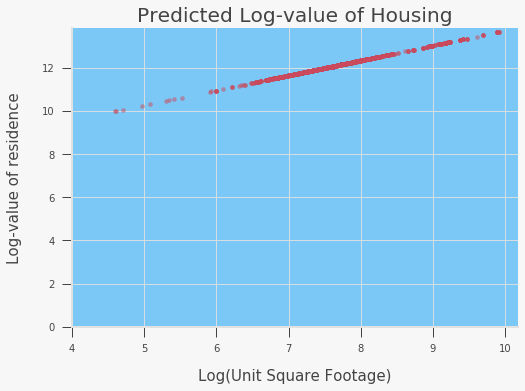

In [20]:
predict_housing_value(ahs)
